# Introduction

In order to successful knowledge discovery in databases (KDD), well-defined and formal methods should be applied for managing data.  Cross-industry standard process for data mining (CRISP-DM) model is a standard methodology, which includes six phases:
    1. Problem domain understanding
    2. Data Understanding
    3. Data Preparation
    4. Modeling
    5. Evaluation
    6. Deployment

----------------------------------------------------------------------------------------------------------------------

# Part 1 - Problem domain understanding

----------------------------------------------------------------------------------------------------------------------

# Part 2 - Data Exploration & Understanding

http://localhost:8888/notebooks/0-MyCollection/00-Sample/01-DataExploration.ipynb

## 1. Import Library and Define Common function

### 1.1. Import Library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import mutual_info_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


### 1.2. Common Function

In [2]:
# Distribution plot

def analyse_continuous(df,var,target):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(20,5))
       
    # histogram
    plt.subplot(131)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(132)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    plt.subplot(133)
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
          
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.show()

In [3]:
def Training_Preparation(df, cont_vars):
    num_df = df[cont_vars].copy()

    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(df[cont_vars]))
    numdf_norm.columns = num_df.columns
    
    # Define X & y
    X = numdf_norm
    y = df['Class']

    # Split to train and test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=90, stratify = y)
    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('LDA',LinearDiscriminantAnalysis()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    # Test options and evaluation metric
    seed = 9
    scoring = 'recall_macro'

    # evaluate each model in turn
    results = {}
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[name] = cv_results
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(16,8))
    sns.boxplot(data=results_df)
    plt.show()

In [4]:
from matplotlib.backends.backend_pdf import PdfPages


def DistributionComparison(all_df, selected_vars,name):
    colors = ['#3791D7','#D72626']

    # pdf = matplotlib.backends.backend_pdf.PdfPages(name + '.pdf')
    with PdfPages(name + '.pdf') as pdf_pages:
        for column in selected_vars:    
            fig = plt.figure(figsize=[8,4])
            plt.subplot(121)
            sns.boxplot(x='Class', y=column,data=all_df,palette=colors)
            plt.title(column, fontsize=12)
            plt.subplot(122)
            sns.kdeplot(all_df[all_df.Class==1][column], bw = 0.4, label = "Cancer", shade=True, color="#D72626", linestyle="--")
            sns.kdeplot(all_df[all_df.Class==0][column], bw = 0.4, label = "NoCancer", shade=True, color= "#3791D7", linestyle=":")
            plt.title(column, fontsize=12)   
            pdf_pages.savefig(fig)                                          
            plt.show()    

    # Write the PDF document to the disk
    #pdf_pages.close()

In [5]:
def ModelEvaluation(df, cont_vars):
    
    num_df = df[cont_vars].copy()

    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(df[cont_vars]))
    numdf_norm.columns = num_df.columns
    
    # Define X & y
    X = numdf_norm
    y = df['Class']

    # Split to train and test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90, stratify = y)
    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('LDA',LinearDiscriminantAnalysis()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    for name,model in models:
        print(name)
        model.fit(X_train, y_train)
        
        print('==========================================================')
        print('Train set')
        y_train_pred = model.predict(X_train)
        print('Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_train, list(y_train_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_train,list(y_train_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_train, list(y_train_pred)))
  
        print('----------------------------------------------------------')
        print('Test set')
        y_test_pred = model.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_test, list(y_test_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_test,list(y_test_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_test, list(y_test_pred)))
        print('==========================================================')
        

In [6]:
from sklearn.manifold import TSNE

def tsne_plot(X, y):
       
        
    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(X))
    numdf_norm.columns = X.columns
    
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(numdf_norm)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y == 0), 0], X_t[np.where(y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='No cancer')
    plt.scatter(X_t[np.where(y == 1), 0], X_t[np.where(y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Colon cancer')

    plt.legend(loc='best');
    plt.show();

In [7]:
# function to find upper and lower boundaries
# for normally distributed variables

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [8]:
# function to find upper and lower boundaries
# for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [9]:
def find_uncorrelated_vars(cancer_df, selected_vars, threshold):

    corrmat = cancer_df[selected_vars].corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
    corrmat['MissingF1'] = corrmat.feature1.apply(lambda x:MissingPercentage(x))
    corrmat['MissingF2'] = corrmat.feature2.apply(lambda x:MissingPercentage(x))
    
    correlated_groups = corrmat[corrmat['corr'] > threshold]
    
    selected_vars = []
    remaining_vars = correlated_groups.feature1.unique()

    while(len(remaining_vars) > 0):
        feature = remaining_vars[0]
        correlated_block = correlated_groups[correlated_groups.feature1 == feature]
        min_ind = correlated_block[['MissingF2']].idxmin() 
        sel_var = correlated_block.feature2[min_ind].values[0]
        removed_vars = [var for var in list(correlated_block.feature2.values)]
        remaining_vars = [var for var in remaining_vars if var not in removed_vars]
        if sel_var not in selected_vars:
            selected_vars = selected_vars + [sel_var]   
    
    return selected_vars

In [10]:
def analyze_na_values(df, var, target):
    tmp_df = df.copy()
    print(target)
    
    # Make a variable that indicates 1 if the observation was missing or 0 otherwise
    tmp_df['Missing'] = np.where(df[var].isnull(),1,0)
    
    # Calculate the mean Price where the information is missing or present
    tmp_df =  pd.DataFrame(tmp_df.groupby([target,'Missing'])[target].count())
    tmp_df.columns = ['Count']
    tmp_df = tmp_df.reset_index()
    
    
    if(len(tmp_df[tmp_df[target] == 0] == 1)):
        tmp_df= tmp_df.append({target:0,'Missing':1,'Count':0}, ignore_index=True)

    if(len(tmp_df[tmp_df[target] == 1] == 1)):
        tmp_df= tmp_df.append({target:1,'Missing':1,'Count':0}, ignore_index=True)

    tmp_df.loc[0,'Per']= tmp_df.loc[0,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[1,'Per']= tmp_df.loc[1,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[2,'Per']= tmp_df.loc[2,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    tmp_df.loc[3,'Per']= tmp_df.loc[3,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    sns.barplot(x=target, y = 'Per', data=tmp_df, hue='Missing')
    plt.title(var)
    plt.show()

In [11]:
def CategoricalDistribution(df, var, target):
    df = df.copy()
    
    # Calculate the mean Price where the information is missing or present
    sns.countplot(x=var, data=df, hue=target)
    plt.title(var)
    plt.show()

In [12]:
def CreateDummyVar(df, categorical_list):
    objdf_new = df.copy()
    objdf_dummy =pd.DataFrame()
    i = 0
    for e in categorical_list:
        i = i + 1
        objdf_new[e] = e + '_' + objdf_new[e].astype(str)
        varname= e 
        df_temp = pd.get_dummies(objdf_new[varname], drop_first=True)
        objdf_dummy = pd.concat([objdf_dummy, df_temp], axis=1)
        
    return objdf_dummy

In [13]:
def MissingPercentage(x):
    return df[x].isnull().sum()/len(df)

## 2. Load raw data

In [234]:
df = pd.read_csv('NHANES-MultipleCycles_merged1.csv')
org_df = df.copy()

df = df[df.RIAGENDR==2]
print(df.shape)

df.head()

(35481, 799)


,SIALANG,WTINT2YR,DMDCITZN,WTMEC2YR,SIAINTRP,SIAPROXY,RIDAGEYR,DMDMARTL,RIDSTATR,MIALANG,FIAPROXY,SDMVPSU,MIAPROXY,RIAGENDR,DMDEDUC2,FIALANG,SEQN,SDMVSTRA,RIDAGEMN,RIDEXPRG,MIAINTRP,DMDYRSUS,DMDEDUC3,DMDHHSIZ,DMDFMSIZ,DMDHRGND,RIDEXMON,RIDRETH1,SDDSRVYR,INDFMPIR,FIAINTRP,MCQ160D,BPQ070,ACD040,MCQ025,IMQ011,PFQ061T,ALQ130,FSDAD,CDQ006,DPQ060,SMQ050U,DEQ034A,HUQ020,SMD100NI,DLQ010,DID250,PFQ061F,HSQ580,DIQ230,DPQ040,DPQ020,SXQ610,INQ012,SMQ710,FSD071,SXQ600,SMQ876,CDQ005,PFQ030,DEQ034C,DEQ038G,INQ020,RHD280,SMQ800,CDQ001,SMAQUEX2,HIQ260,PFQ061I,MCQ050,DLQ050,RHQ602U,FSD151,HSQ500,FSD111,HUQ071,PFQ051,SMQ690F,DIQ350U,SMQ870,HIQ031B,INQ150,SMQ670,HIQ210,CDQ009A,MCQ160L,SMD100TR,SXQ590,PFQ041,PFQ061Q,SMDUPCA,BPQ100D,HIQ031A,SMQ856,MCQ160A,SMQ690D,HSQ571,DLQ040,DIQ180,SXD171,SXQ130,OCQ260,SMQ868,FSD032A,FSD032E,PFQ063D,FSDHH,SXQ251,FSQ162,DPQ050,BPQ080,SXQ270,OCQ210,CDQ009H,INQ090,SMD057,INDFMMPI,RHQ060,PFQ061S,SMD100FL,BPQ030,RHD143,RHQ420,HIQ011,SMQ690B,DPQ070,SMQ020,FSDCH,HSD010,SMQ050Q,SXD031,RHQ171,HIQ031I,RHQ291,DEQ034D,PFQ020,PFQ061D,MCQ053,SMQ880,DPQ100,HIQ031C,SMD100MN,MCQ230B,ALQ110,RHQ586U,MCQ160F,OCD270,SMQ690C,ALQ101,MCQ170L,FSD102,FSD032F,OCQ380,INQ140,RHQ166,OCD390G,HEQ040,SMQ770,CDQ009D,PUQ110,RHQ020,RHQ169,BPQ090D,MCQ080,SXQ265,OCD395,DLQ020,SLQ050,MCQ160M,DIQ080,PFQ061A,RHQ070,RHQ010,HIQ031AA,SMQ720,INQ060,RHQ131,BPQ020,HUQ030,BPQ040A,SMD100LN,DID060,PFQ049,DED031,ECD010,SMQ817,HSAQUEX,HIQ031F,MCQ300B,CDQ008,MCQ300A,INDFMMPC,DIQ360,DIQ050,PFQ061N,PUQ100,RHQ031,DLQ060,SMD641,FSD061,SMQ040,ECQ150,SMQ690A,FSD032C,PFQ090,DIQ010,IND235,RHQ576U,FSD122,PFQ061M,DLQ080,RHQ602Q,MCQ160G,DIQ260U,SMQ725,FSD032B,FSD052,PFQ061P,FSD146,DPQ080,HSQ590,RHQ160,PFQ061K,PFQ061C,PFQ063A,PFQ063E,MCQ160E,WHQ030E,ALQ120U,OCD150,MCQ230D,HEQ030,FSD132,ECQ090,DIQ170,PFQ061J,PFQ061O,CDQ009G,MCQ220,MCQ040,MCQ230A,SMQ840,SMQ872,DID350,MCQ080E,DID260,FSD141,DPQ030,HIQ031J,DIQ060U,RHQ596,SMQ874,MCQ149,MCQ300C,MCQ160C,SXQ272,RHQ554,FSD081,SMQ740,SXQ410,SXQ280,CDQ009C,SMD100CO,RHQ560U,SMQ860,SMD030,PFQ061R,RHQ576Q,MCQ230C,HIQ031E,RHQ540,HUQ090,CDQ003,MCQ092,PFQ063C,PFQ057,IMQ020,HSQ510,SXQ550,RHQ560Q,MCQ160K,SMD650,INQ030,INQ132,DID040,ECQ020,RHQ570,CDQ010,HEQ010,DPQ090,MCQ170M,PFQ061H,SMQ830,RHQ200,HUD080,ALQ120Q,BPQ050A,FSD032D,MCD093,PFQ063B,SMQ878,HEQ020,MCQ170K,CDQ002,MCQ010,SMQ858,PFQ061G,MCQ035,SMQ690E,ECQ080,HIQ105,HUQ010,RHQ580,FSD092,CDQ009F,SMD100BR,SMD630,PFQ059,PFQ061B,CDQ009B,CDQ004,CDQ009E,DPQ010,ECD070A,ECD070B,DIQ240,SXQ490,HSQ520,FSD041,BPQ060,HIQ270,INQ080,PFQ061L,PFQ054,SMD093,PFQ061E,HIQ031H,SXQ260,HIQ031D,SMQ866,OCQ180,MCQ160B,DIQ160,SMQ862,RHQ586Q,LBDSGLSI,URDTIME2,LBDSBUSI,LBDHDDSI,URDMNPLC,LBXHCG,LBDLYMNO,LBXSCA,PHQ060,URXMBP,LBDSCASI,URXMZP,URDFLOW2,ORXH51,ORXH64,LBXGLU,ORXHPC,LBXBGE,LBDHEG,LBXBPB,LBDWFL,LBDBCDSI,ORXGL,ORXH69,URXUMS,LBXSGL,LBXSOSSI,LBXIHG,URXMHH,LBDSALSI,URXVOL3,PHQ050,URXMHP,LBDHD,LBXHCR,ORXH62,URDTIME1,URDCNPLC,LBXSZN,LBXSKSI,LBDTHGSI,URXMIB,URDFLOW3,ORXHPV,URXMNP,LBXBCD,LBXSATSI,LBXSBU,ORXH11,LBDSTRSI,LBDSCRSI,ORXH73,LBXSUA,URXUTRI,ORXH26,ORXH31,LBDHBG,LBDSTPSI,PHASUPHR,ORXH82,LBXHE1,LBXSTR,ORXH53,ORXH58,URXVOL1,LBXLYPCT,URXVOL2,LBDSTBSI,LBDHEM,URXECP,LBDTCSI,LBXSCLSI,LBXSNASI,URDMZPLC,LBXSAL,PHAGUMHR,LBXNEPCT,PHQ020,LBXBGM,LBXHGB,ORXH35,ORXH84,LBXSTP,LBDIHGLC,URXCNP,LBXPLTSI,LBDIHGSI,URXPREG,LBDSIRSI,PHQ040,LBXSGTSI,LBDBGELC,PHAANTHR,ORXH68,LBXBAPCT,URDMEPLC,LBXSTB,ORXH81,LBXMCHSI,ORXGH,LBDNENO,LBXSCR,ORXH52,URDMBPLC,LBDSZNSI,ORXH56,LBXHE2,LBXMOPCT,LBXMPSI,ORXH61,LBDBGMLC,LBXSIR,PHAANTMN,PHACOFHR,URDECPLC,URDMOHLC,ORXH33,ORXH06,ORXHPI,LBDTHGLC,LBDSCUSI,LBDMONO,PHAALCMN,LBXRBCSI,URDMHPLC,URXUIO,LBDSUASI,LBDSPHSI,URDCOPLC,URXCRS,URDMC1LC,URXMEP,ORXH45,ORXH55,LBXMCVSI,ORXH71,LBXSCH,URXMC1,LBXGLT,LBDEONO,PHQ030,ORXH40,ORXH39,ORXH83,ORXH66,LBXHBC,ORXH72,WTSVS2YR,LBXSLDSI,LBXRDW,WTFSM,ORXH54,PHAGUMMN,ORXH70,LBXSGB,LBDBPBSI,URXUCL,LBDGLTSI,LBDWFLLC,WTSVOC2Y,URXCOP,LBDGLUSI,LBXSCU,LBXSSE,LBXWBCSI,LBDHDD,LBDSSESI,PHAALCHR,URDFLOW1,LBXHA,ORXH59,LBXSC3SI,LBXSPH,PHACOFMN,PHASUPMN,ORXH67,WTSOG2YR,ORXH42,URXUMA,LBXSAS

## 4. Target variable analysis

In [235]:
df[(df.MCQ230C.isna()== False) | (df.MCQ230D.isna()== False)].shape

(26, 799)

In [236]:
df = df[(df.MCQ230C.isna()) & (df.MCQ230D.isna())]
df.shape

(35455, 799)

In [237]:
df[(df['MCQ230A'] != 14) & (df['MCQ230B'] != 14) & (df.MCQ220 == 1)].shape

(1376, 799)

In [238]:
df = df[(df['MCQ230A'] == 14) | (df['MCQ230B'] == 14) | (df.MCQ220 == 2)]
df.shape

(19079, 799)

In [239]:
# no cancer group, excellent health
df['Class'] == 0

# breast cancer
df.loc[df.MCQ220 == 1,'Class'] = 1

df[df.Class == 1].shape[0]/df.shape[0],df[df.Class == 1].shape[0],df[df.Class == 0].shape[0]

(0.03165784370250013, 604, 18475)

In [240]:
# number of cancer <= 45 and num of cancer > 45
(df[(df.Class == 1) & (df.RIDAGEYR <= 45)].shape, df[(df.Class == 1) & (df.RIDAGEYR > 45)].shape)

((27, 799), (577, 799))

In [241]:
# number of no cancer <= 45 and num of no cancer > 45
(df[(df.Class == 0) & (df.RIDAGEYR <= 45)].shape, df[(df.Class == 0) & (df.RIDAGEYR > 45)].shape)

((8891, 799), (9584, 799))

In [242]:
df = df[df.RIDAGEYR > 45]
df.shape

(10161, 799)

In [243]:
pd.DataFrame([df[df.Class == 0].RIDAGEYR.describe(),df[df.Class == 1].RIDAGEYR.describe()],index=['NoCancer','Cancer'])

,count,mean,std,min,25%,50%,75%,max
NoCancer,9584.0,62.505426,10.700078,46.0,53.0,62.0,71.0,85.0
Cancer,577.0,68.532062,10.125914,46.0,61.0,70.0,79.0,85.0


In [244]:
df[df.Class == 1].shape[0]/df.shape[0],df[df.Class == 1].shape[0],df[df.Class == 0].shape[0]

(0.05678574943411081, 577, 9584)

In [245]:
df = df.reset_index(drop = True)
df.shape

(10161, 799)

## 4. Categorize vars

In [246]:
target = ['Class']

cont_vars = ['RIDAGEYR', 'RIDAGEMN', 'INDFMPIR', 'LBXSAL', 'LBDSGLSI', 'URDTIME2', 'LBDSBUSI', 'LBDHDDSI', 'LBDLYMNO', 'LBXSCA', 'URXMBP', 'LBDSCASI', 'URXMZP', 'URDFLOW2', 'LBXGLU', 'LBXBPB', 'LBDBCDSI', 'URXUMS', 'LBXSGL', 'LBXSOSSI', 'URXUAC', 'LBXIHG', 'URXMHH', 'URXMHP', 'URXUBA', 'WTFSM', 'URXUUR', 'URDTIME1', 'URXUSR', 'LBXSZN', 'URXUTU', 'LBXSKSI', 'URXUSN', 'URXUMMA', 'LBDTHGSI', 'URXMIB', 'URXUMO', 'URXMNP', 'LBXBCD', 'URXUDMA', 'LBXSATSI', 'LBXSBU', 'LBXV4C', 'LBDSTRSI', 'LBXVBZ', 'LBDSCRSI', 'LBXSUA', 'LBXVOX', 'URXUAS', 'URXUSB', 'LBDSTPSI', 'LBXVXY', 'LBXSTR', 'WTSA2YR', 'URXVOL1', 'LBXLYPCT', 'URXUTL', 'URXUPB', 'URXVOL2', 'PHAFSTMN', 'LBXVEB', 'URXECP', 'LBDTCSI', 'LBXNEPCT', 'LBXBGM', 'LBXHGB', 'LBXSTP', 'URXCNP', 'LBXPLTSI', 'LBDIHGSI', 'LBDSIRSI', 'LBXSGTSI', 'URXUCO', 'LBXBAPCT', 'LBXMCHSI', 'LBDNENO', 'LBXSCR', 'LBDSZNSI', 'LBXMOPCT', 'LBXMPSI', 'LBXVDB', 'LBXSIR', 'URXUCS', 'LBX2DF', 'URXUAB', 'LBDSCUSI', 'LBXRBCSI', 'URXUIO', 'LBDSUASI', 'LBDSPHSI', 'URXCRS', 'URXMEP', 'URXUCD', 'LBXMCVSI', 'URXUAS3', 'LBXSCH', 'URXMC1', 'LBXGLT', 'WTSVS2YR', 'LBXSLDSI', 'LBXRDW', 'PHAGUMMN', 'LBXSGB', 'LBDBPBSI', 'LBDGLTSI', 'WTSVOC2Y', 'URXCOP', 'LBDGLUSI', 'LBXSCU', 'LBXSSE', 'LBXWBCSI', 'LBDHDD', 'LBDSSESI', 'URDFLOW1', 'WTSAF2YR', 'LBXSPH', 'WTSOG2YR', 'URXUMA', 'LBXSASSI', 'LBXEOPCT', 'LBDSGBSI', 'LBXSAPSI', 'LBXTC', 'LBXMC', 'LBXTHG', 'LBDSCHSI', 'URXMOH', 'LBDSALSI', 'PHAFSTHR', 'DXDLAPF', 'DXDTRBMD', 'DXDSTBMC', 'DXXTRFAT', 'DXXHEFAT', 'DXDSTLE', 'DXXRALI', 'DXDTOFAT', 'DXDTOBMD', 'DXXLSBMC', 'DXXTRLI', 'DXDRATOT', 'BPXDI3', 'DXXHEA', 'DXDTOPF', 'DXDRLTOT', 'DXDTRPF', 'DXXLLBMD', 'DXXRLLI', 'BMXARMC', 'DXDRALE', 'DXXLLBMC', 'DXXLALI', 'DXXLRBMC', 'DXXPEA', 'DXDRAPF', 'BPXDI1', 'DXXPEBMD', 'DXDTRTOT', 'DXXRAA', 'DXDLLPF', 'BMXARML', 'DXXHELI', 'DXXRRA', 'DXDSTBMD', 'BPXDI4', 'DXXLLLI', 'DXDRLPF', 'BPXDI2', 'DXXLSBMD', 'BPXPLS', 'DXDTOBMC', 'DXDTOLE', 'DXXLRBMD', 'DXDTRLE', 'DXXHEBMC', 'DXDSTTOT', 'DXXRLA', 'BMXLEG', 'BPXSY1', 'DXXLAA', 'DXXLABMC', 'DXDLALE', 'DXDTRA', 'BMXWT', 'DXXTSBMC', 'DXXLLA', 'DXXLLFAT', 'DXDTOLI', 'BMXHT', 'DXXLABMD', 'DXDSTLI', 'DXXRRBMD', 'DXXLSA', 'DXDSTA', 'DXDTRBMC', 'DXXRABMC', 'DXDHELE', 'DXDHETOT', 'DXXHEBMD', 'DXDTOA', 'DXXRABMD', 'DXDRLLE', 'DXXLRA', 'DXXRRBMC', 'BPXSY2', 'DXDLLLE', 'DXXTSBMD', 'BMXBMI', 'DXDSTFAT', 'DXXRLFAT', 'DXXRLBMD', 'DXXRAFAT', 'DXDLATOT', 'BMXWAIST', 'DXDLLTOT', 'DXDSTPF', 'DXDHEPF', 'DXXLAFAT', 'DXXRLBMC', 'BPXSY3', 'BPXSY4', 'DXXTSA', 'DXXPEBMC', 'DXDTOTOT']
print(len(cont_vars))

dis_vars = ['DMDYRSUS', 'DMDEDUC2', 'DMDHHSIZ', 'DMDFMSIZ', 'BPXML1', 'BPACSZ', 'FCX10DI', 'FCX11DI', 'FCX06DI', 'FCX08DI', 'FCX07DI', 'FCX09DI', 'LBXBGE', 'URXVOL3', 'URXUAS5', 'URDFLOW3', 'LBXVTE', 'LBDSTBSI', 'URXUMN', 'LBXVTC', 'LBXSTB', 'PHAANTMN', 'PHAALCMN', 'PHACOFMN', 'PHASUPMN', 'URDTIME3', 'LBXV2A', 'LBXV1D', 'LBXVMC', 'LBXVNB', 'LBXV3B', 'LBXVCB', 'LBXVCT', 'LBDMONO', 'LBDEONO', 'LBDBANO', 'PHASUPHR', 'LBXSCLSI', 'LBXSNASI', 'PHAGUMHR', 'PHAANTHR', 'PHACOFHR', 'PHAALCHR', 'LBXSC3SI']
print(len(dis_vars))

cat_vars = ['RIDRETH1', 'RIDEXMON', 'DMDCITZN', 'DMDMARTL', 'RIDEXPRG', 'URDMNPLC', 'PHQ060', 'ORXH51', 'ORXH64', 'ORXHPC', 'LBDHEG', 'ORXGL', 'ORXH69', 'PHQ050', 'LBDVCTLC', 'LBD2DFLC', 'LBXHCR', 'ORXH62', 'URDCNPLC', 'URDUSNLC', 'ORXHPV', 'LBDVTCLC', 'URDUA3LC', 'URDUTLLC', 'URDUTULC', 'URDUDALC', 'ORXH11', 'URDUCOLC', 'ORXH73', 'URXUTRI', 'ORXH26', 'ORXH31', 'LBDHBG', 'ORXH82', 'LBXHE1', 'ORXH53', 'ORXH58', 'URDUURLC', 'LBDHEM', 'URDMZPLC', 'URDUBALC', 'LBDVTELC', 'LBDV1DLC', 'PHQ020', 'LBDV3BLC', 'URDUACLC', 'URDUSBLC', 'ORXH35', 'ORXH84', 'LBDIHGLC', 'URXPREG', 'LBDV4CLC', 'PHQ040', 'URDUPBLC', 'LBDBGELC', 'URDUMMAL', 'URDUMNLC', 'ORXH68', 'URDUA5LC', 'URDMEPLC', 'ORXH81', 'LBDVOXLC', 'ORXGH', 'LBDVCBLC', 'LBDVBZLC', 'ORXH52', 'URDMBPLC', 'ORXH56', 'LBXHE2', 'ORXH61', 'LBDBGMLC', 'URDECPLC', 'URDUCDLC', 'LBDVNBLC', 'URDMOHLC', 'ORXH33', 'ORXH06', 'ORXHPI', 'LBDTHGLC', 'URDUMOLC', 'LBDVXYLC', 'URDMHPLC', 'URDCOPLC', 'URDMC1LC', 'ORXH45', 'ORXH55', 'ORXH71', 'PHQ030', 'LBDVMCLC', 'URDUSRLC', 'ORXH40', 'ORXH39', 'ORXH83', 'ORXH66', 'LBXHBC', 'LBDVDBLC', 'LBDVEBLC', 'ORXH72', 'ORXH54', 'ORXH70', 'URDUCSLC', 'URXUCL', 'LBDV2ALC', 'LBDWFLLC', 'URDUABLC', 'LBXHA', 'ORXH59', 'ORXH67', 'ORXH42', 'ORXH18', 'URDMHHLC', 'PHDSESN', 'URDMIBLC', 'ORXH16', 'LBXHBS', 'LBXHCG', 'OHARNF', 'OHAPOS', 'BMIARML', 'OHDDESTS', 'OHAROCGP', 'OHX23TC', 'BPAEN2', 'OHAROCOH', 'OHAROCDE', 'OHX02TC', 'OHX30TC', 'OHXIMP', 'OHX14TC', 'OHAROTH', 'BMDSTATS', 'OHX16TC', 'OHX05TC', 'BMIARMC', 'BPAEN3', 'OHX26TC', 'OHAREC', 'BPAARM', 'OHAROCCI', 'BMILEG', 'BPAEN4', 'OHX01TC', 'BMXRECUM', 'OHX09TC', 'BMIHT', 'BPXCHR', 'OHX32TC', 'OHX18TC', 'OHDRCSTS', 'BPXPTY', 'BMXHEAD', 'OHX19TC', 'OHX15TC', 'OHDEXSTS', 'OHAROCDT', 'BMIHEAD', 'BMIRECUM', 'OHX03TC', 'BPXPULS', 'OHX17TC', 'BMIWT', 'BPAEN1', 'OHX31TC', 'OHX08TC', 'BMIWAIST', 'DXARLBV', 'DXALLBV', 'DXARABV', 'FCX10DI', 'OHX06TC', 'DXALABV', 'DXARLTV', 'OHX04TC', 'OHX12TC', 'FCX08DI', 'OHX27TC', 'OHX13TC', 'DXAHEBV', 'OHX22TC', 'OHX10TC', 'OHX29TC', 'OHX21TC', 'FCX07DI', 'OHX28TC', 'OHX07TC', 'FCX09DI', 'DXARATV', 'OHX24TC', 'PEASCCT1', 'DXALLTV', 'OHX25TC', 'OHX11TC', 'DXAHETV', 'DXAEXSTS']      
print(len(cat_vars))

224
44
194


## 6. Final dataset

In [247]:
HC_df = df.groupby(['HSD010','Class'])['Class'].count().unstack()
HC_df['Percentage_0'] = df[df.Class == 0].groupby(['HSD010'])['HSD010'].count()/df[df.Class==0].shape[0]
HC_df['Percentage_1'] = df[df.Class == 1].groupby(['HSD010'])['HSD010'].count()/df[df.Class==1].shape[0]

HC_df

Class,0,1,Percentage_0,Percentage_1
HSD010,,,,
1.0,596.0,22.0,0.062187,0.038128
2.0,1941.0,147.0,0.202525,0.254766
3.0,3310.0,197.0,0.345367,0.341421
4.0,2098.0,111.0,0.218907,0.192374
5.0,436.0,42.0,0.045492,0.072790
9.0,2.0,NaN,0.000209,NaN


In [248]:
df = df[df.HSD010 < 4]
df = df[((df.Class == 0) & (df.HSD010 == 1)) | (df.Class== 1)]

df.shape, df[df.Class == 1].shape, df[df.Class == 0].shape

((962, 799), (366, 799), (596, 799))

## 5. Check missing data of all features

In [249]:
all_vars = cont_vars+dis_vars+cat_vars
miss_df = pd.DataFrame(df[all_vars].isnull().sum(),columns=['Count'])
miss_df['Percentage'] = 100 * df[all_vars].isnull().sum()/len(df)
miss_df = miss_df.sort_values('Percentage', ascending=True)
miss_df = miss_df.reset_index()
miss_df.columns = ['Feature','Count','Percentage']
miss_df.head()

,Feature,Count,Percentage
0,RIDAGEYR,0,0.0
1,BMDSTATS,0,0.0
2,DMDMARTL,0,0.0
3,RIDEXMON,0,0.0
4,RIDRETH1,0,0.0


### Mann U Whitney test 

In [250]:
import scipy

ttest_df = pd.DataFrame(columns = ['Feature','FeatureName','t-stats','p-value','Skew','Kurtosis'])
ttest_df['Feature'] = cont_vars + dis_vars
ttest_df['FeatureName'] = cont_vars + dis_vars

df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]

for var in cont_vars + dis_vars:
    result = scipy.stats.ranksums(df0[df0[var].isna()==False][var], df1[df1[var].isna()==False][var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
    ttest_df.loc[ttest_df['Feature'] == var,'Skew'] = df[var].skew()
    ttest_df.loc[ttest_df['Feature'] == var,'Kurtosis'] = df[var].kurt()
  
ttest_df['abs_tstats'] = np.abs(ttest_df['t-stats'])
ttest_df = ttest_df.sort_values(['abs_tstats'], ascending = False)
ttest_df = ttest_df.merge(miss_df, left_on = 'Feature',right_on='Feature',how='inner')

ttest_df

,Feature,FeatureName,t-stats,p-value,Skew,Kurtosis,abs_tstats,Count,Percentage
0,RIDAGEYR,RIDAGEYR,-9.71917,2.49806e-22,0.0119253,-1.21633,9.71917,0,0.000000
1,LBDSUASI,LBDSUASI,-6.62514,3.4692e-11,0.822597,1.0581,6.62514,60,6.237006
2,LBXSUA,LBXSUA,-6.62514,3.4692e-11,0.822674,1.05798,6.62514,60,6.237006
3,LBDSALSI,LBDSALSI,6.17758,6.50934e-10,-0.20228,0.541096,6.17758,60,6.237006
4,LBXSAL,LBXSAL,6.17758,6.50934e-10,-0.20228,0.541096,6.17758,60,6.237006
5,RIDAGEMN,RIDAGEMN,-6.16065,7.24459e-10,0.0728599,-1.05386,6.16065,605,62.889813
6,LBXSGL,LBXSGL,-5.67268,1.40584e-08,4.5326,29.1414,5.67268,60,6.237006
7,LBDSGLSI,LBDSGLSI,-5.67268,1.40584e-08,4.53216,29.1352,5.67268,60,6.237006
8,BMXWAIST,BMXWAIST,-5.65773,1.53392e-08,0.581018,0.587253,5.65773,33,3.430353
9,LBXLYPCT,LBXLYPCT,5.40121,6.61945e-08,0.391299,0.452049,5.40121,45,4.677755


# Part 3: Data Preprocessing

## 1. Numerical vars

### 1.1. Handling missing values

In [251]:
num_vars = cont_vars+dis_vars

miss_num_df = pd.DataFrame(df[num_vars].isnull().sum(),columns=['Count'])
miss_num_df['Percentage'] = 100 * df[num_vars].isnull().sum()/len(df)
miss_num_df = miss_num_df.sort_values('Percentage', ascending=False)
miss_num_df.tail()

,Count,Percentage
BMXWT,6,0.623701
DMDFMSIZ,0,0.000000
DMDHHSIZ,0,0.000000
DMDEDUC2,0,0.000000
RIDAGEYR,0,0.000000


#### Select cont vars with missing value <= 30%

In [252]:
num_vars = list(miss_num_df[miss_num_df.Percentage <= 20].index)
print(len(num_vars))
print(num_vars)

91
['LBXTHG', 'LBDTHGSI', 'LBXBPB', 'LBXBCD', 'LBDBPBSI', 'LBDBCDSI', 'INDFMPIR', 'BPXSY3', 'BPXDI3', 'BPXSY2', 'BPXDI2', 'BPXSY1', 'BPXDI1', 'LBXSLDSI', 'LBXSASSI', 'LBXSC3SI', 'LBXSATSI', 'LBDSBUSI', 'LBXSTB', 'LBXSIR', 'LBXSCR', 'LBXSAL', 'LBDSGLSI', 'LBXSNASI', 'LBXSGTSI', 'LBDSIRSI', 'LBXSTP', 'LBDSTBSI', 'LBXSTR', 'LBDSTPSI', 'LBDSPHSI', 'LBXSUA', 'LBDSCRSI', 'LBDSTRSI', 'LBXSBU', 'LBXSKSI', 'LBXSOSSI', 'LBXSGL', 'LBDSCASI', 'LBXSCA', 'LBDSUASI', 'LBXSCLSI', 'LBXSPH', 'LBDSALSI', 'LBDSCHSI', 'LBXSCH', 'LBXSAPSI', 'LBDSGBSI', 'LBXSGB', 'LBXTC', 'LBDHDDSI', 'LBDTCSI', 'LBDHDD', 'LBXNEPCT', 'LBXEOPCT', 'LBDMONO', 'LBXLYPCT', 'LBDEONO', 'LBDNENO', 'LBXBAPCT', 'LBDBANO', 'LBDLYMNO', 'LBXMOPCT', 'LBXPLTSI', 'LBXWBCSI', 'LBXRBCSI', 'LBXMCHSI', 'LBXHGB', 'LBXRDW', 'LBXMC', 'LBXMPSI', 'LBXMCVSI', 'BMXLEG', 'BMXWAIST', 'BMXARMC', 'BMXARML', 'BPXPLS', 'PHAFSTMN', 'PHAFSTHR', 'BPACSZ', 'BPXML1', 'URXUMS', 'URXUMA', 'URXCRS', 'BMXBMI', 'BMXHT', 'BMXWT', 'DMDFMSIZ', 'DMDHHSIZ', 'DMDEDUC2', 'RI

#### Remove observations with 40% of missing data

In [253]:
df['FeatureCount'] = df[num_vars].count(axis=1)
df['FeatureMissing'] = len(num_vars) - df['FeatureCount']
df['MissingPercentage'] = df.FeatureMissing/len(num_vars)
df[['FeatureMissing','MissingPercentage']].describe()

,FeatureMissing,MissingPercentage
count,962.000000,962.000000
mean,5.301455,0.058258
std,14.455665,0.158853
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,4.000000,0.043956
max,80.000000,0.879121


In [254]:
print(df[(df['MissingPercentage'] > 0.6) & (df['Class'] == 1)].shape)
df = df[df['MissingPercentage'] <= 0.6]
df = df.reset_index(drop=True)

df.shape, len(df[(df['Class'] == 1)])/len(df)

(22, 802)


((924, 802), 0.3722943722943723)

#### Filling missing data 

In [255]:
for var in num_vars:
    df[var] = df[var].fillna(df[var].median())

### 1.2. Remove outliers

In [256]:
for var in num_vars:
    upper_boundary, lower_boundary = find_skewed_boundaries(df, var, 3.5)
    df.loc[df[var] <= lower_boundary,var] = lower_boundary
    df.loc[df[var] >= upper_boundary,var] = upper_boundary

### 1.3. Gaussian Transformation

In [305]:
from sklearn.preprocessing import quantile_transform

Gauss_transformed_vars = ['URDTIME1','URXVOL1','LBXTHG','LBDTHGSI','LBXSGTSI','URXCRS','URXUMS','URXUMA']

for var in Gauss_transformed_vars:
    df[var] = quantile_transform(np.array(df[var]).reshape(-1,1), n_quantiles=20, random_state=0, copy=True)

### 1.4. Only use sig cont vars 

In [306]:
import scipy

ttest_df = pd.DataFrame(columns = ['Feature','FeatureName','t-stats','p-value','Skew','Kurtosis'])
ttest_df['Feature'] = num_vars
ttest_df['FeatureName'] = num_vars

df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]

for var in num_vars:
    result = scipy.stats.ranksums(df0[df0[var].isna()==False][var], df1[df1[var].isna()==False][var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
    ttest_df.loc[ttest_df['Feature'] == var,'Skew'] = df[var].skew()
    ttest_df.loc[ttest_df['Feature'] == var,'Kurtosis'] = df[var].kurt()
  
ttest_df['abs_tstats'] = np.abs(ttest_df['t-stats'])
ttest_df = ttest_df.sort_values(['abs_tstats'], ascending = False)
ttest_df = ttest_df.merge(miss_df, left_on = 'Feature',right_on='Feature',how='inner')

ttest_df

,Feature,FeatureName,t-stats,p-value,Skew,Kurtosis,abs_tstats,Count,Percentage
0,RIDAGEYR,RIDAGEYR,-9.68957,3.33938e-22,0.0339133,-1.21069,9.68957,0,0.000000
1,LBDSUASI,LBDSUASI,-6.61742,3.6551e-11,0.842708,1.16473,6.61742,60,6.237006
2,LBDSALSI,LBDSALSI,6.16405,7.0908e-10,-0.206636,0.627872,6.16405,60,6.237006
3,LBXSGL,LBXSGL,-5.67867,1.35745e-08,1.68255,3.05439,5.67867,60,6.237006
4,BMXWAIST,BMXWAIST,-5.47047,4.48842e-08,0.606323,0.684858,5.47047,33,3.430353
5,LBDSTRSI,LBDSTRSI,-4.87494,1.08843e-06,1.64235,3.16591,4.87494,60,6.237006
6,LBDEONO,LBDEONO,-4.68573,2.7896e-06,1.12676,1.54114,4.68573,45,4.677755
7,BMXARML,BMXARML,-4.61994,3.83842e-06,0.100935,0.186732,4.61994,29,3.014553
8,LBXSOSSI,LBXSOSSI,-4.38739,1.14718e-05,-0.0851992,0.983618,4.38739,60,6.237006
9,LBDHDDSI,LBDHDDSI,4.18098,2.9026e-05,0.599703,0.426191,4.18098,58,6.029106


In [307]:
num_vars = list(ttest_df[ttest_df['p-value'] <= 0.05].sort_values(['abs_tstats'],ascending=False).Feature)
print(num_vars)
print(len(num_vars))

['RIDAGEYR', 'LBDSUASI', 'LBDSALSI', 'LBXSGL', 'BMXWAIST', 'LBDSTRSI', 'LBDEONO', 'BMXARML', 'LBXSOSSI', 'LBDHDDSI', 'LBXRDW', 'BPACSZ', 'URXUMA', 'BMXARMC', 'LBDLYMNO', 'BPXSY3', 'BPXML1', 'LBDSTPSI', 'DMDFMSIZ', 'LBXSGTSI', 'LBXEOPCT', 'LBXNEPCT', 'BMXWT', 'BPXSY1', 'LBXSLDSI', 'LBDSCRSI', 'LBXSBU', 'LBDMONO', 'LBDSCHSI', 'BPXDI1', 'BPXDI2', 'LBXMOPCT', 'BPXDI3', 'BMXLEG', 'LBDBANO', 'LBXSIR', 'INDFMPIR', 'LBDNENO', 'LBXBAPCT', 'LBDSTBSI']
40


In [308]:
len(num_vars)

40

### 1.4. Remove features with high correlation

In [309]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = df[num_vars].corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)

corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat['MissingF1'] = corrmat.feature1.apply(lambda x:MissingPercentage(x))
corrmat['MissingF2'] = corrmat.feature2.apply(lambda x:MissingPercentage(x))
corrmat.head()

,feature1,feature2,corr,MissingF1,MissingF2
0,LBDSTBSI,LBDSTBSI,1.0,0.0,0.0
1,LBDSCHSI,LBDSCHSI,1.0,0.0,0.0
2,LBXNEPCT,LBXNEPCT,1.0,0.0,0.0
3,BMXWT,BMXWT,1.0,0.0,0.0
4,BPXSY1,BPXSY1,1.0,0.0,0.0


In [310]:
correlated_groups = corrmat[corrmat['corr'] > 0.90]
correlated_groups.head()

,feature1,feature2,corr,MissingF1,MissingF2
0,LBDSTBSI,LBDSTBSI,1.0,0.0,0.0
1,LBDSCHSI,LBDSCHSI,1.0,0.0,0.0
2,LBXNEPCT,LBXNEPCT,1.0,0.0,0.0
3,BMXWT,BMXWT,1.0,0.0,0.0
4,BPXSY1,BPXSY1,1.0,0.0,0.0


In [311]:
num_vars = []
remaining_vars = correlated_groups.feature1.unique()

while(len(remaining_vars) > 0):
    feature = remaining_vars[0]
    correlated_block = correlated_groups[correlated_groups.feature1 == feature]
    min_ind = correlated_block[['MissingF2']].idxmin() 
    sel_var = correlated_block.feature2[min_ind].values[0]
    removed_vars = [var for var in list(correlated_block.feature2.values)]
    remaining_vars = [var for var in remaining_vars if var not in removed_vars]
    if sel_var not in num_vars:
        num_vars = num_vars + [sel_var]    
    
print(num_vars)
len(num_vars)

['LBDSTBSI', 'LBDSCHSI', 'LBXNEPCT', 'BMXWT', 'BPXSY1', 'LBXSLDSI', 'LBDSCRSI', 'LBXSBU', 'LBDMONO', 'BPXDI1', 'LBXSGTSI', 'BPXDI2', 'LBXMOPCT', 'BPXDI3', 'BMXLEG', 'LBDBANO', 'LBXSIR', 'INDFMPIR', 'LBXEOPCT', 'DMDFMSIZ', 'LBXBAPCT', 'LBXSOSSI', 'LBDSUASI', 'LBDSALSI', 'LBXSGL', 'BMXWAIST', 'LBDSTRSI', 'LBDEONO', 'BMXARML', 'LBDHDDSI', 'LBDSTPSI', 'LBXRDW', 'BPACSZ', 'URXUMA', 'BMXARMC', 'LBDLYMNO', 'BPXSY3', 'BPXML1', 'LBDNENO', 'RIDAGEYR']


40

### 1.5. Feature Scaling

In [312]:
from sklearn.preprocessing import MinMaxScaler
df = df.reset_index(drop=True)

scaler = MinMaxScaler(feature_range = (0, 1))
selected_features = [var for var in df.columns if var not in ['Class']]

X_scaled = df[num_vars]
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))
X_scaled.columns = num_vars
print(X_scaled.shape)
X_scaled.head()

(924, 40)


,LBDSTBSI,LBDSCHSI,LBXNEPCT,BMXWT,BPXSY1,LBXSLDSI,LBDSCRSI,LBXSBU,LBDMONO,BPXDI1,LBXSGTSI,BPXDI2,LBXMOPCT,BPXDI3,BMXLEG,LBDBANO,LBXSIR,INDFMPIR,LBXEOPCT,DMDFMSIZ,LBXBAPCT,LBXSOSSI,LBDSUASI,LBDSALSI,LBXSGL,BMXWAIST,LBDSTRSI,LBDEONO,BMXARML,LBDHDDSI,LBDSTPSI,LBXRDW,BPACSZ,URXUMA,BMXARMC,LBDLYMNO,BPXSY3,BPXML1,LBDNENO,RIDAGEYR
0,0.642857,0.610266,0.589147,0.466411,0.428571,0.485900,0.504114,0.688525,0.500000,0.812500,0.931603,0.776786,0.536313,0.975610,0.478469,0.333333,0.531818,1.000,0.388060,0.166667,0.434783,0.475,0.553006,0.913043,0.388626,0.421622,0.533263,0.363636,0.723684,0.755102,0.620690,0.213904,0.75,0.292004,0.480363,0.178218,0.488189,0.581395,0.282723,0.384615
1,0.142857,0.320886,0.418605,0.185863,0.317460,0.342733,0.256171,0.262295,0.500000,0.416667,0.039474,0.544643,0.542698,0.609756,0.540670,0.000000,0.313636,0.234,0.218905,0.166667,0.217391,0.250,0.247033,0.304348,0.322275,0.154595,0.255932,0.181818,0.427632,0.367347,0.379310,0.299465,0.50,0.301619,0.305136,0.376238,0.267717,0.488372,0.230366,0.769231
2,0.357143,0.519037,0.719380,0.184986,0.587302,0.477223,0.256171,0.327869,0.333333,0.583333,0.315789,0.633929,0.210694,0.804878,0.435407,1.000000,0.136364,0.624,0.199005,0.166667,1.000000,0.400,0.341179,0.478261,0.274882,0.308108,0.258263,0.363636,0.217105,0.445578,0.310345,0.855615,0.50,0.800226,0.268882,0.277228,0.566929,0.767442,0.586387,0.692308
3,0.142857,0.182460,0.755039,0.298082,0.206349,0.277657,0.421466,0.262295,0.250000,0.354167,0.789474,0.401786,0.178771,0.365854,0.722488,0.333333,0.527273,0.732,0.189055,0.000000,0.260870,0.200,0.294106,0.434783,0.170616,0.230270,0.418432,0.363636,0.453947,0.227891,0.758621,0.442068,0.75,0.442105,0.444109,0.237624,0.141732,0.441860,0.523560,0.051282
4,0.357143,0.632283,0.637209,0.292822,0.206349,0.347072,0.256171,0.131148,0.250000,0.500000,0.945428,0.455357,0.255387,0.585366,0.397129,0.000000,0.486364,0.650,0.208955,0.333333,0.173913,0.500,0.211828,0.826087,0.303318,0.269189,0.217585,0.181818,0.407895,0.384354,0.724138,0.156863,0.75,0.532164,0.410876,0.237624,0.141732,0.441860,0.314136,0.128205


In [313]:
scaled_df = pd.concat([X_scaled, df.Class],axis =1)
scaled_df.to_csv('BreastCancer_LogisticRegression.csv',index=False)

In [314]:
scaled_df.head()

,LBDSTBSI,LBDSCHSI,LBXNEPCT,BMXWT,BPXSY1,LBXSLDSI,LBDSCRSI,LBXSBU,LBDMONO,BPXDI1,LBXSGTSI,BPXDI2,LBXMOPCT,BPXDI3,BMXLEG,LBDBANO,LBXSIR,INDFMPIR,LBXEOPCT,DMDFMSIZ,LBXBAPCT,LBXSOSSI,LBDSUASI,LBDSALSI,LBXSGL,BMXWAIST,LBDSTRSI,LBDEONO,BMXARML,LBDHDDSI,LBDSTPSI,LBXRDW,BPACSZ,URXUMA,BMXARMC,LBDLYMNO,BPXSY3,BPXML1,LBDNENO,RIDAGEYR,Class
0,0.642857,0.610266,0.589147,0.466411,0.428571,0.485900,0.504114,0.688525,0.500000,0.812500,0.931603,0.776786,0.536313,0.975610,0.478469,0.333333,0.531818,1.000,0.388060,0.166667,0.434783,0.475,0.553006,0.913043,0.388626,0.421622,0.533263,0.363636,0.723684,0.755102,0.620690,0.213904,0.75,0.292004,0.480363,0.178218,0.488189,0.581395,0.282723,0.384615,1
1,0.142857,0.320886,0.418605,0.185863,0.317460,0.342733,0.256171,0.262295,0.500000,0.416667,0.039474,0.544643,0.542698,0.609756,0.540670,0.000000,0.313636,0.234,0.218905,0.166667,0.217391,0.250,0.247033,0.304348,0.322275,0.154595,0.255932,0.181818,0.427632,0.367347,0.379310,0.299465,0.50,0.301619,0.305136,0.376238,0.267717,0.488372,0.230366,0.769231,0
2,0.357143,0.519037,0.719380,0.184986,0.587302,0.477223,0.256171,0.327869,0.333333,0.583333,0.315789,0.633929,0.210694,0.804878,0.435407,1.000000,0.136364,0.624,0.199005,0.166667,1.000000,0.400,0.341179,0.478261,0.274882,0.308108,0.258263,0.363636,0.217105,0.445578,0.310345,0.855615,0.50,0.800226,0.268882,0.277228,0.566929,0.767442,0.586387,0.692308,1
3,0.142857,0.182460,0.755039,0.298082,0.206349,0.277657,0.421466,0.262295,0.250000,0.354167,0.789474,0.401786,0.178771,0.365854,0.722488,0.333333,0.527273,0.732,0.189055,0.000000,0.260870,0.200,0.294106,0.434783,0.170616,0.230270,0.418432,0.363636,0.453947,0.227891,0.758621,0.442068,0.75,0.442105,0.444109,0.237624,0.141732,0.441860,0.523560,0.051282,0
4,0.357143,0.632283,0.637209,0.292822,0.206349,0.347072,0.256171,0.131148,0.250000,0.500000,0.945428,0.455357,0.255387,0.585366,0.397129,0.000000,0.486364,0.650,0.208955,0.333333,0.173913,0.500,0.211828,0.826087,0.303318,0.269189,0.217585,0.181818,0.407895,0.384354,0.724138,0.156863,0.75,0.532164,0.410876,0.237624,0.141732,0.441860,0.314136,0.128205,0


In [315]:
scaled_df.shape

(924, 41)

## 2. Categorical vars

### 2.1. Handling missing data

In [316]:
miss_cat_df = pd.DataFrame(df[cat_vars].isnull().sum(),columns=['Count'])
miss_cat_df['Percentage'] = 100 * df[cat_vars].isnull().sum()/len(df)
miss_cat_df = miss_cat_df.sort_values('Percentage', ascending=False)
miss_cat_df.tail()

,Count,Percentage
BPXPULS,0,0.0
LBXHBC,0,0.0
BPAEN2,0,0.0
BPAEN3,0,0.0
RIDRETH1,0,0.0


In [317]:
cat_vars = list(miss_cat_df[miss_cat_df.Percentage <= 5].index)
print(len(cat_vars))
print(cat_vars)

20
['BPAEN1', 'LBXHA', 'PHQ050', 'PHQ030', 'BMDSTATS', 'PHDSESN', 'PHQ020', 'PHQ040', 'DMDMARTL', 'PHQ060', 'RIDEXMON', 'DMDCITZN', 'LBXHBS', 'BPXPTY', 'BPAARM', 'BPXPULS', 'LBXHBC', 'BPAEN2', 'BPAEN3', 'RIDRETH1']


#### Filling missing data

In [318]:
for var in cat_vars:
    df[var] = df[var].fillna(-1)

### 2.2. Create dummy var

In [319]:
def CreateDummyVar(df, categorical_list):
    objdf_new = df.copy()
    objdf_dummy =pd.DataFrame()
    i = 0
    for e in categorical_list:
        i = i + 1
        objdf_new[e] = e + '_' + objdf_new[e].astype(str)
        varname= e 
        df_temp = pd.get_dummies(objdf_new[varname], drop_first=True)
        objdf_dummy = pd.concat([objdf_dummy, df_temp], axis=1)
        
    return objdf_dummy

In [320]:
dummy_df = CreateDummyVar(df, cat_vars)
dummy_vars = list(dummy_df.columns)

print(dummy_df.shape)
dummy_df.head()

(924, 40)


,BPAEN1_2.0,LBXHA_1.0,LBXHA_2.0,PHQ050_2.0,PHQ030_2.0,BMDSTATS_2.0,BMDSTATS_3.0,BMDSTATS_4.0,PHDSESN_1.0,PHDSESN_2.0,PHQ020_2.0,PHQ040_2.0,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,PHQ060_2.0,RIDEXMON_2.0,DMDCITZN_1.0,DMDCITZN_2.0,LBXHBS_1.0,LBXHBS_2.0,BPXPTY_1.0,BPXPTY_2.0,BPAARM_1.0,BPAARM_2.0,BPXPULS_1.0,BPXPULS_2.0,LBXHBC_1.0,LBXHBC_2.0,BPAEN2_1.0,BPAEN2_2.0,BPAEN3_1.0,BPAEN3_2.0,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5
0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
1,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
3,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
4,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0


In [321]:
final_df = pd.concat([dummy_df, X_scaled,df[target]],1)
selected_vars = dummy_vars + num_vars
final_df.shape

(924, 81)

In [322]:
final_df.head()

,BPAEN1_2.0,LBXHA_1.0,LBXHA_2.0,PHQ050_2.0,PHQ030_2.0,BMDSTATS_2.0,BMDSTATS_3.0,BMDSTATS_4.0,PHDSESN_1.0,PHDSESN_2.0,PHQ020_2.0,PHQ040_2.0,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,PHQ060_2.0,RIDEXMON_2.0,DMDCITZN_1.0,DMDCITZN_2.0,LBXHBS_1.0,LBXHBS_2.0,BPXPTY_1.0,BPXPTY_2.0,BPAARM_1.0,BPAARM_2.0,BPXPULS_1.0,BPXPULS_2.0,LBXHBC_1.0,LBXHBC_2.0,BPAEN2_1.0,BPAEN2_2.0,BPAEN3_1.0,BPAEN3_2.0,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5,LBDSTBSI,LBDSCHSI,LBXNEPCT,BMXWT,BPXSY1,LBXSLDSI,LBDSCRSI,LBXSBU,LBDMONO,BPXDI1,LBXSGTSI,BPXDI2,LBXMOPCT,BPXDI3,BMXLEG,LBDBANO,LBXSIR,INDFMPIR,LBXEOPCT,DMDFMSIZ,LBXBAPCT,LBXSOSSI,LBDSUASI,LBDSALSI,LBXSGL,BMXWAIST,LBDSTRSI,LBDEONO,BMXARML,LBDHDDSI,LBDSTPSI,LBXRDW,BPACSZ,URXUMA,BMXARMC,LBDLYMNO,BPXSY3,BPXML1,LBDNENO,RIDAGEYR,Class
0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0.642857,0.610266,0.589147,0.466411,0.428571,0.485900,0.504114,0.688525,0.500000,0.812500,0.931603,0.776786,0.536313,0.975610,0.478469,0.333333,0.531818,1.000,0.388060,0.166667,0.434783,0.475,0.553006,0.913043,0.388626,0.421622,0.533263,0.363636,0.723684,0.755102,0.620690,0.213904,0.75,0.292004,0.480363,0.178218,0.488189,0.581395,0.282723,0.384615,1
1,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0.142857,0.320886,0.418605,0.185863,0.317460,0.342733,0.256171,0.262295,0.500000,0.416667,0.039474,0.544643,0.542698,0.609756,0.540670,0.000000,0.313636,0.234,0.218905,0.166667,0.217391,0.250,0.247033,0.304348,0.322275,0.154595,0.255932,0.181818,0.427632,0.367347,0.379310,0.299465,0.50,0.301619,0.305136,0.376238,0.267717,0.488372,0.230366,0.769231,0
2,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0.357143,0.519037,0.719380,0.184986,0.587302,0.477223,0.256171,0.327869,0.333333,0.583333,0.315789,0.633929,0.210694,0.804878,0.435407,1.000000,0.136364,0.624,0.199005,0.166667,1.000000,0.400,0.341179,0.478261,0.274882,0.308108,0.258263,0.363636,0.217105,0.445578,0.310345,0.855615,0.50,0.800226,0.268882,0.277228,0.566929,0.767442,0.586387,0.692308,1
3,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0.142857,0.182460,0.755039,0.298082,0.206349,0.277657,0.421466,0.262295,0.250000,0.354167,0.789474,0.401786,0.178771,0.365854,0.722488,0.333333,0.527273,0.732,0.189055,0.000000,0.260870,0.200,0.294106,0.434783,0.170616,0.230270,0.418432,0.363636,0.453947,0.227891,0.758621,0.442068,0.75,0.442105,0.444109,0.237624,0.141732,0.441860,0.523560,0.051282,0
4,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0.357143,0.632283,0.637209,0.292822,0.206349,0.347072,0.256171,0.131148,0.250000,0.500000,0.945428,0.455357,0.255387,0.585366,0.397129,0.000000,0.486364,0.650,0.208955,0.333333,0.173913,0.500,0.211828,0.826087,0.303318,0.269189,0.217585,0.181818,0.407895,0.384354,0.724138,0.156863,0.75,0.532164,0.410876,0.237624,0.141732,0.441860,0.314136,0.128205,0


----------------------------------------------------------------------------------------------------------------------

# Part 4: Feature Selection

----------------------------------------------------------------------------------------------------------------------

# Part 5: Predictive Model

## 5.1. Numerical vars

### Split data into X & y

In [323]:
X = X_scaled
y = df['Class']

### Split data into train and test set

In [324]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((739, 40), (185, 40))

In [325]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.3721244925575101
0.372972972972973


### Train Logistic Regression using statsmodel

In [326]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.Logit(y_train, X_train_const)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.530713
         Iterations 6


In [327]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  739
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                           40
Date:                Fri, 08 Jan 2021   Pseudo R-squ.:                  0.1960
Time:                        07:00:29   Log-Likelihood:                -392.20
converged:                       True   LL-Null:                       -487.80
Covariance Type:            nonrobust   LLR p-value:                 1.318e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6549      2.522     -1.846      0.065      -9.597       0.288
LBDSTBSI      -1.2850      0.578     -2.224      0.026      -2.418      -0.153
LBDSCHSI      -1.2556      0.806     -1.559      0.119      -2.834       0.323
LBXNEPCT       1.1466      2.570      0.446      0.655      -3.890       6.184
BMXWT          0.7754      1.919      0.404      0.686      -2.986       4.537
BPXSY1        -1.3943      1.351     -1.032      0.302      -4.043       1.254
LBXSLDSI       0.8715      0.807      1.080      0.280      -0.710       2.453
LBDSCRSI      -1.0771      0.712     -1.513      0.130      -2.472       0.318
LBXSBU        -1.2290      0.715     -1.720      0.085      -2.630       0.172
LBDMONO       -2.7394      2.308     -1.187      0.235      -7.263       1.785
BPXDI1         0.1246      1.254      0.099      0.921      -2.333       2.583
LBXSGTSI       0.5542      0.343      1.615      0.106      -0.118       1.227
BPXDI2        -1.9787      1.760     -1.124      0.261      -5.428       1.470
LBXMOPCT       3.9014      2.335      1.671      0.095      -0.674       8.477
BPXDI3         1.6086      1.279      1.258      0.208      -0.898       4.115
BMXLEG        -1.0113      0.796     -1.270      0.204      -2.571       0.549
LBDBANO        0.5898      0.866      0.681      0.496      -1.107       2.287
LBXSIR         0.3810      0.713      0.535      0.593      -1.016       1.778
INDFMPIR       0.5302      0.323      1.644      0.100      -0.102       1.162
LBXEOPCT      -3.3027      1.675     -1.971      0.049      -6.586      -0.019
DMDFMSIZ      -0.5255      0.423     -1.242      0.214      -1.355       0.304
LBXBAPCT       0.8414      0.878      0.958      0.338      -0.879       2.562
LBXSOSSI       0.3153      0.843      0.374      0.708      -1.336       1.967
LBDSUASI       2.7766      0.758      3.665      0.000       1.292       4.261
LBDSALSI      -0.7444      0.848     -0.878      0.380      -2.406       0.918
LBXSGL         1.0039      0.532      1.888      0.059      -0.038       2.046
BMXWAIST      -2.0497      1.495     -1.371      0.170      -4.980       0.881
LBDSTRSI       0.4073      0.629      0.648      0.517      -0.825       1.640
LBDEONO        3.6487      1.368      2.667      0.008       0.968       6.330
BMXARML        2.4381      0.871      2.799      0.005       0.731       4.145
LBDHDDSI      -1.1268      0.816     -1.382      0.167      -2.725       0.472
LBDSTPSI      -0.3383      0.693     -0.488      0.625      -1.696       1.019
LBXRDW         0.1150      0.615      0.187      0.852      -1.091       1.321
BPACSZ         0.2492      1.022      0.244      0.807      -1.754       2.253
URXUMA         0.1494      0.338      0.442      0.659      -0.513       0.812
BMXARMC        1.1683      1.657      0.705      0.481      -2.079       4.416
LBDLYMNO      -1.6816      2.464     -0.683      0.495      -6.510       3.147
BPXSY3        -0.6038      1.304     -0.463      0.643      -3.159       1.951
BP

In [328]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.196     
Dependent Variable: Class            AIC:              866.3938  
Date:               2021-01-08 07:00 BIC:              1055.2110 
No. Observations:   739              Log-Likelihood:   -392.20   
Df Model:           40               LL-Null:          -487.80   
Df Residuals:       698              LLR p-value:      1.3182e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -4.6549    2.5217  -1.8459  0.0649  -9.5974   0.2877
LBDSTBSI      -1.2850    0.5778  -2.2239  0.0262  -2.4175  -0.1525
LBDSCHSI      -1.2556    0.8055  -1.5588  0.1190  -2.8345   0.3232
LBXNEPCT       1.1466    2.5699   0.4462  0.6555  -3.8902   6.1835
BMXWT          0.7754    1.9192   0.4041  0.6862  -2.9861   4.5370
BPXSY1        -1.3943    1.3513  -1.0318  0.3022  -4.0429   1.2542
LBXSLDSI       0.8715    0.8069   1.0801  0.2801  -0.7099   2.4529
LBDSCRSI      -1.0771    0.7119  -1.5130  0.1303  -2.4724   0.3182
LBXSBU        -1.2290    0.7146  -1.7197  0.0855  -2.6297   0.1717
LBDMONO       -2.7394    2.3083  -1.1868  0.2353  -7.2635   1.7847
BPXDI1         0.1246    1.2541   0.0993  0.9209  -2.3334   2.5825
LBXSGTSI       0.5542    0.3431   1.6154  0.1062  -0.1182   1.2266
BPXDI2        -1.9787    1.7597  -1.1244  0.2608  -5.4275   1.4702
LBXMOPCT       3.9014    2.3345   1.6712  0.0947  -0.6742   8.4769
BPXDI3         1.6086    1.2787   1.2580  0.2084  -0.8976   4.1147
BMXLEG        -1.0113    0.7960  -1.2704  0.2039  -2.5715   0.5489
LBDBANO        0.5898    0.8660   0.6811  0.4958  -1.1075   2.2870
LBXSIR         0.3810    0.7128   0.5345  0.5930  -1.0161   1.7781
INDFMPIR       0.5302    0.3225   1.6439  0.1002  -0.1019   1.1623
LBXEOPCT      -3.3027    1.6754  -1.9713  0.0487  -6.5864  -0.0189
DMDFMSIZ      -0.5255    0.4232  -1.2417  0.2144  -1.3549   0.3040
LBXBAPCT       0.8414    0.8779   0.9585  0.3378  -0.8792   2.5620
LBXSOSSI       0.3153    0.8427   0.3741  0.7083  -1.3363   1.9668
LBDSUASI       2.7766    0.7576   3.6648  0.0002   1.2916   4.2615
LBDSALSI      -0.7444    0.8480  -0.8779  0.3800  -2.4064   0.9176
LBXSGL         1.0039    0.5316   1.8884  0.0590  -0.0381   2.0459
BMXWAIST      -2.0497    1.4952  -1.3709  0.1704  -4.9803   0.8808
LBDSTRSI       0.4073    0.6289   0.6476  0.5173  -0.8254   1.6399
LBDEONO        3.6487    1.3680   2.6672  0.0076   0.9675   6.3299
BMXARML        2.4381    0.8710   2.7993  0.0051   0.7311   4.1452
LBDHDDSI      -1.1268    0.8156  -1.3816  0.1671  -2.7253   0.4717
LBDSTPSI      -0.3383    0.6927  -0.4884  0.6253  -1.6960   1.0193
LBXRDW         0.1150    0.6153   0.1869  0.8517  -1.0910   1.3210
BPACSZ         0.2492    1.0223   0.2438  0.8074  -1.7545   2.2528
URXUMA         0.1494    0.3381   0.4419  0.6585  -0.5133   0.8121
BMXARMC        1.1683    1.6569   0.7051  0.4808  -2.0792   4.4157
LBDLYMNO      -1.6816    2.4636  -0.6826  0.4949  -6.5102   3.1470
BPXSY3        -0.6038    1.3036  -0.4632  0.6433  -3.1588   1.9513
BPXML1         2.4541    1.8719   1.3110  0.1898  -1.2147   6.1229
LBDNENO        0.5889    1.9440   0.3029  0.7619  -3.2213   4.3991
RIDAGEYR       2.4044    0.4953   4.8545  0.0000   1.4336   3.3751
=================================================================

"""

In [329]:
y_train_pred = result.predict(X_train_const)
y_test_pred = result.predict(X_test_const)

### Train and perform Cross Validation

In [330]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
kfold = KFold(n_splits = 10, random_state = 10)
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall_macro')
scores

array([0.63431677, 0.651341  , 0.62062937, 0.71394799, 0.60897436,
       0.70982143, 0.60559006, 0.65785256, 0.65862069, 0.58531746])

In [331]:
print("ROC AUC score: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()))

ROC AUC score: 64.46% (+/- 4.06%)


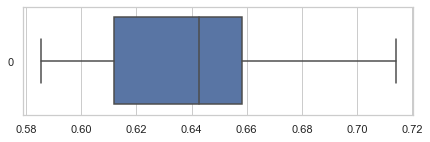

In [332]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

### Train Logistic Regression using sklearn

#### Train model

In [333]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Prediction

In [334]:
y_train_pred = model.predict(X_train)
prob_train_pred = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
prob_test_pred = model.predict_proba(X_test)

#### Model Interpretation: intercept and coefficients 

In [335]:
model.intercept_

array([-3.21842786])

In [336]:
model.coef_

array([[-0.8317534 , -0.85105684,  0.7904725 ,  0.15323717, -0.38956117,
         0.50677966, -0.45214515, -0.72005621, -0.01255729, -0.09844563,
         0.55646836, -0.39907949,  1.09754357,  0.36361463, -0.32234975,
         0.51595216,  0.08431697,  0.3240431 , -0.27052284, -0.52103417,
         0.61034027,  0.21750002,  1.58316126, -0.74637965,  0.75460574,
        -0.35085921,  0.45392243,  0.88004564,  1.36871082, -0.73377567,
        -0.33749082,  0.19477855,  0.36710467,  0.16904628,  0.63827552,
        -1.39402755, -0.11941678,  0.45439384, -0.0533812 ,  1.9022475 ]])

In [337]:
feature_names = X.columns.values
coefficient_list = list(model.coef_[0])
feature_coefficient = [(feature, coefficient) for feature, coefficient in zip(feature_names, coefficient_list) ]
feature_coefficient

[('LBDSTBSI', -0.8317533967265928),
 ('LBDSCHSI', -0.851056838246447),
 ('LBXNEPCT', 0.7904725013052477),
 ('BMXWT', 0.15323717186892885),
 ('BPXSY1', -0.3895611674648692),
 ('LBXSLDSI', 0.5067796632416591),
 ('LBDSCRSI', -0.4521451491834472),
 ('LBXSBU', -0.7200562080595252),
 ('LBDMONO', -0.012557293893274705),
 ('BPXDI1', -0.09844563244164967),
 ('LBXSGTSI', 0.5564683571759904),
 ('BPXDI2', -0.39907949173728435),
 ('LBXMOPCT', 1.0975435735294907),
 ('BPXDI3', 0.3636146254901047),
 ('BMXLEG', -0.32234975023267354),
 ('LBDBANO', 0.5159521607364499),
 ('LBXSIR', 0.08431696912058323),
 ('INDFMPIR', 0.3240431024904909),
 ('LBXEOPCT', -0.2705228381640868),
 ('DMDFMSIZ', -0.5210341729960823),
 ('LBXBAPCT', 0.6103402736356943),
 ('LBXSOSSI', 0.21750001539131764),
 ('LBDSUASI', 1.5831612573948866),
 ('LBDSALSI', -0.7463796456656107),
 ('LBXSGL', 0.7546057403756149),
 ('BMXWAIST', -0.3508592123718463),
 ('LBDSTRSI', 0.4539224306446832),
 ('LBDEONO', 0.8800456360109699),
 ('BMXARML', 1.3687108

In [338]:
coefficient_list = np.abs(list(model.coef_[0]))
feature_importance = pd.DataFrame()
feature_importance['FeatureName'] = feature_names
feature_importance['Coef'] = model.coef_[0]
feature_importance['Abs_Coef'] = coefficient_list

feature_importance.sort_values(['Abs_Coef'],ascending = False)

,FeatureName,Coef,Abs_Coef
39,RIDAGEYR,1.902247,1.902247
22,LBDSUASI,1.583161,1.583161
35,LBDLYMNO,-1.394028,1.394028
28,BMXARML,1.368711,1.368711
12,LBXMOPCT,1.097544,1.097544
27,LBDEONO,0.880046,0.880046
1,LBDSCHSI,-0.851057,0.851057
0,LBDSTBSI,-0.831753,0.831753
2,LBXNEPCT,0.790473,0.790473
24,LBXSGL,0.754606,0.754606


#### Summary table

In [339]:
def LogisticSummaryTable(classifier, X):
    feature_name = X.columns.values
    summary_table = pd.DataFrame(columns = ['FeatureName'], data = feature_name)
    summary_table['Coefficient'] = np.transpose(classifier.coef_)
    summary_table.index = summary_table.index + 1
    summary_table.loc[0] = ['Intercept', classifier.intercept_[0]]
    summary_table = summary_table.sort_index()
    summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
    summary_table = summary_table.sort_values('Odds_ratio', ascending = False)
    
    return summary_table

In [340]:
LogisticSummaryTable(model, X_train)

,FeatureName,Coefficient,Odds_ratio
40,RIDAGEYR,1.902247,6.700938
23,LBDSUASI,1.583161,4.870328
29,BMXARML,1.368711,3.930281
13,LBXMOPCT,1.097544,2.996796
28,LBDEONO,0.880046,2.411010
3,LBXNEPCT,0.790473,2.204438
25,LBXSGL,0.754606,2.126773
35,BMXARMC,0.638276,1.893213
21,LBXBAPCT,0.610340,1.841058
11,LBXSGTSI,0.556468,1.744501


#### Accuracy

In [341]:
print('Train: ',accuracy_score(y_train, y_train_pred))
print('Test: ', accuracy_score(y_test, y_test_pred))

Train:  0.7239512855209743
Test:  0.7135135135135136


#### Confusion Matrix & Classification Report

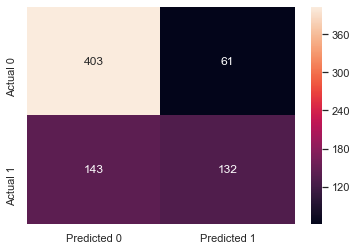

In [342]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
sns.heatmap(cm_df, annot = True, fmt="d")
plt.show()

In [343]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       464
           1       0.68      0.48      0.56       275

    accuracy                           0.72       739
   macro avg       0.71      0.67      0.68       739
weighted avg       0.72      0.72      0.71       739



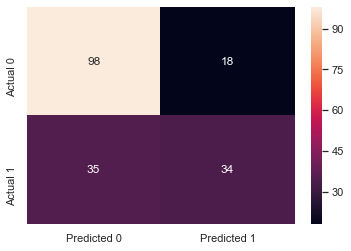

In [344]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [345]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       116
           1       0.65      0.49      0.56        69

    accuracy                           0.71       185
   macro avg       0.70      0.67      0.67       185
weighted avg       0.71      0.71      0.70       185



#### ROC AUC Score

In [346]:
print(roc_auc_score(y_train, prob_train_pred[:,1]))
print(roc_auc_score(y_test, prob_test_pred[:,1]))

0.7813009404388714
0.7781109445277362


In [347]:
print(roc_auc_score(y_train, y_train_pred))
print(roc_auc_score(y_test, y_test_pred))

0.6742672413793104
0.6687906046976512


#### ROC Curve

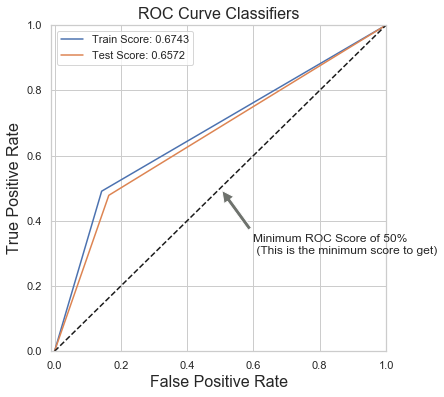

In [299]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, threshold = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

#### Precision-Recall curve

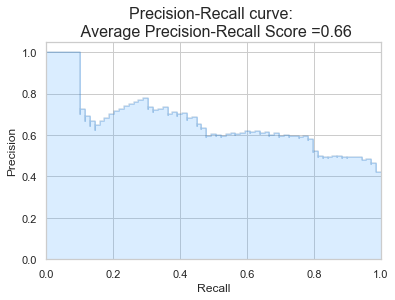

In [300]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_test_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)
plt.show()

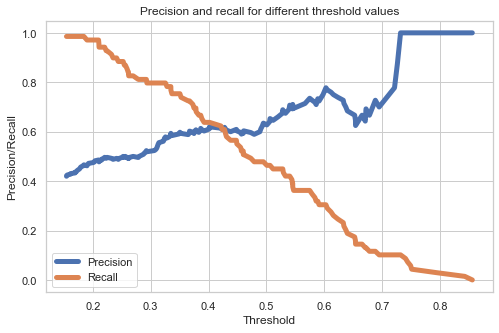

In [301]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.66')

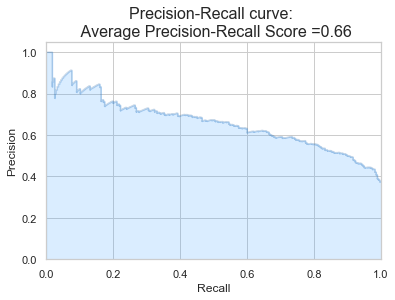

In [302]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_train_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

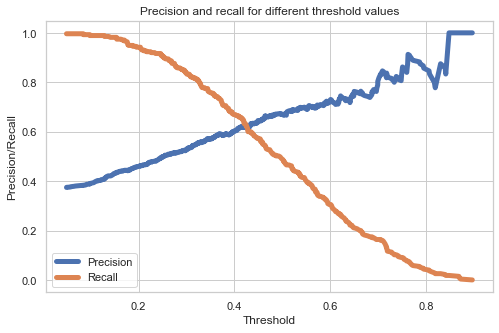

In [303]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

#### Summary

In [304]:
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)

    print('-----------------------------------------------------------')
    print('Train set')
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, y_train_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_train,y_train_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_train, y_train_pred))
    
    print('-----------------------------------------------------------')
    print('Test set')
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, y_test_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_test, y_test_pred))
    
ModelEvaluation(model,X_train,y_train,X_test,y_test,'Logistic Regression')

Model Evaluation of Logistic Regression
-----------------------------------------------------------
Train set
Accuracy:  0.7212449255751014
ROC AUC Score:  0.674333855799373
Confusion matrix
Predicted    0    1
Actual             
0          398   66
1          140  135
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       464
           1       0.67      0.49      0.57       275

    accuracy                           0.72       739
   macro avg       0.71      0.67      0.68       739
weighted avg       0.71      0.72      0.71       739

-----------------------------------------------------------
Test set
Accuracy:  0.7027027027027027
ROC AUC Score:  0.6572338830584707
Confusion matrix
Predicted   0   1
Actual           
0          97  19
1          36  33
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       116
           1       0.63      0.48      0.55        69

    accuracy   

### Tuning hyper-parameters

#### Apply Grid search and KFold Cross Validation

In [174]:
# Specify parameters
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid_search = GridSearchCV(LogisticRegression(), params, cv = 10, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=libli

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............

[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..........

[CV]  C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV

[CV]  C=10, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=newton-cg .............
[CV]  C=10, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[C

[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ..

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   11.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                       

#### Best model

In [175]:
grid_search.best_params_

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}

In [176]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Rerun with the best model

In [177]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 69.01% (+/- 7.01%)


In [178]:
scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 69.41% (+/- 6.05%)


In [179]:
scores

array([0.66216216, 0.68918919, 0.71621622, 0.74324324, 0.67567568,
       0.7027027 , 0.68918919, 0.74324324, 0.66216216, 0.65753425])

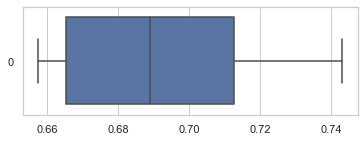

In [180]:
plt.figure(figsize=(6,2))
sns.boxplot(data=scores, orient='h')
plt.show()

In [181]:
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
prob_train_pred = best_model.predict_proba(X_train)

y_test_pred = best_model.predict(X_test)
prob_test_pred = best_model.predict_proba(X_test)

In [182]:
LogisticSummaryTable(best_model, X_train)

,FeatureName,Coefficient,Odds_ratio
40,RIDAGEYR,1.793589,6.010985
24,LBDSUASI,1.543197,4.679526
30,BMXARML,1.315318,3.725934
29,LBDEONO,0.874328,2.397265
16,LBXMOPCT,0.843852,2.325307
26,LBXSGL,0.665635,1.945726
19,LBDBANO,0.608463,1.837605
4,LBXSGTSI,0.558799,1.748571
37,BMXARMC,0.558663,1.748334
13,LBXBAPCT,0.450690,1.569395


In [183]:
ModelEvaluation(best_model,X_train,y_train,X_test,y_test,'LogisticRegression')

Model Evaluation of LogisticRegression
-----------------------------------------------------------
Train set
Accuracy:  0.7253044654939107
ROC AUC Score:  0.678307210031348
Confusion matrix
Predicted    0    1
Actual             
0          400   64
1          139  136
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       464
           1       0.68      0.49      0.57       275

    accuracy                           0.73       739
   macro avg       0.71      0.68      0.69       739
weighted avg       0.72      0.73      0.71       739

-----------------------------------------------------------
Test set
Accuracy:  0.7135135135135136
ROC AUC Score:  0.6687906046976512
Confusion matrix
Predicted   0   1
Actual           
0          98  18
1          35  34
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       116
           1       0.65      0.49      0.56        69

    accuracy    

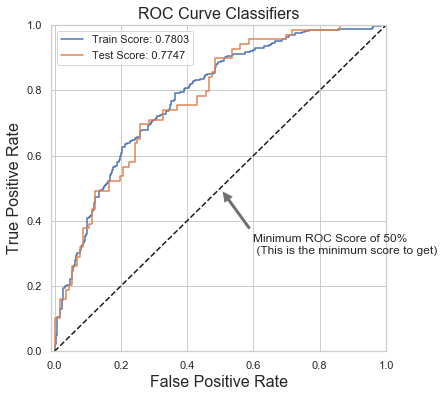

In [184]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

In [185]:
y_score = best_model.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)

precision_recall_df = pd.DataFrame([precision[0:len(threshold)],recall[0:len(threshold)],threshold]).T
precision_recall_df.columns = ['precision','recall','threshold']
precision_recall_df.head(6)

,precision,recall,threshold
0,0.408284,1.000000,-1.814109
1,0.404762,0.985507,-1.795391
2,0.407186,0.985507,-1.773455
3,0.409639,0.985507,-1.771484
4,0.412121,0.985507,-1.723639
5,0.414634,0.985507,-1.700850


Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.67')

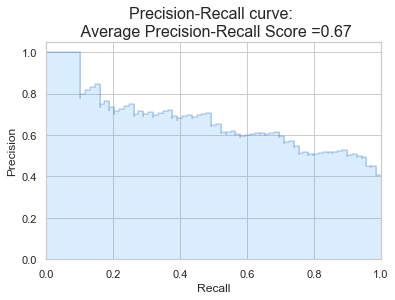

In [186]:
plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

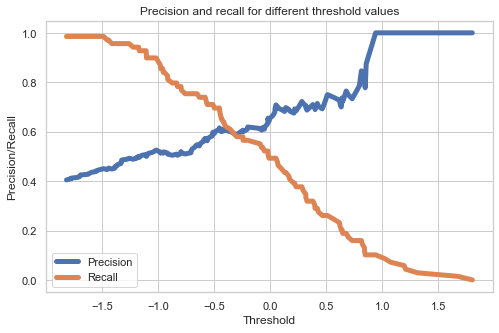

In [187]:
sns.set(style = 'whitegrid',context = 'notebook')
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()